In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

from sklearn.preprocessing import StandardScaler, scale, RobustScaler,robust_scale

import math
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import Normalizer, normalize

import seaborn as sns; 
sns.set(color_codes=True)
from sklearn.preprocessing import QuantileTransformer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import FactorAnalysis

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction import DictVectorizer

from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.feature_extraction.image \
    import extract_patches_2d, reconstruct_from_patches_2d
from skimage import color
from skimage import io

from skimage.data import coins
from sklearn.cluster import AgglomerativeClustering

from scipy.ndimage.filters import gaussian_filter
from skimage.transform import rescale
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

# Preparing Numerical Data

## Diabetes Dataset

In [2]:
df = pd.read_csv('datasets/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


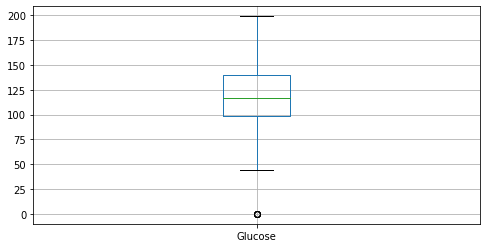

In [11]:
# Check the boxplot of one column
df.boxplot(column=['Glucose'], figsize=(8,4))
plt.show()

* Upper box edge: Q3
* Lower box edge: Q1
* Horizontal line inside box: Median
* Whiskers: Extend up to extreme value or up to 1.5xIQR from Q1 or Q3
* Circles: Outliers (beyond 1.5xIQR from Q1 and Q3)

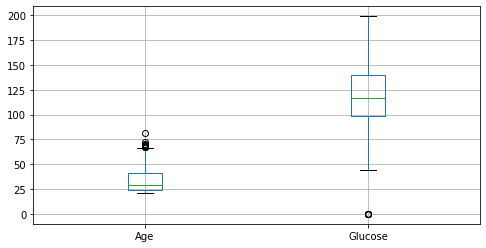

In [12]:
# Compare two features
df.boxplot(column=['Age', 'Glucose'], figsize=(8,4))
plt.show()

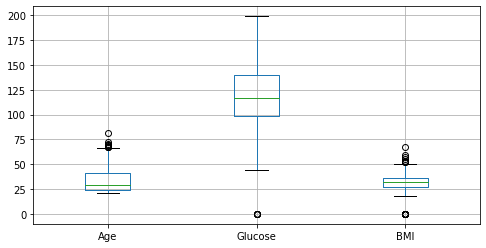

In [13]:
df.boxplot(column=['Age', 'Glucose','BMI'], figsize=(8,4))
plt.show()

In [14]:
# Drop the target column not wanted
outcome = df['Outcome']
df = df.drop(['Outcome'], axis = 1)

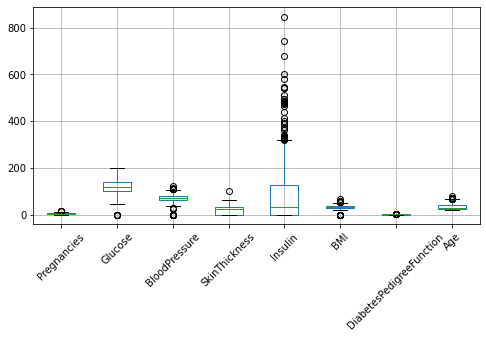

In [15]:
# Boxplot of all the features distributions
df.boxplot(figsize=(8,4), rot=45)
plt.show()

# Scaling

In [16]:
# Scale just the three features of interest
scaled_df = pd.DataFrame()
scaled_df['Glucose'] = scale(df['Glucose'])
scaled_df['BMI'] = scale(df['BMI'])
scaled_df['Age'] = scale(df['Age'])

In [17]:
# Examine the scaled features statistics
scaled_df.describe()

,Glucose,BMI,Age
count,7.680000e+02,7.680000e+02,7.680000e+02
mean,3.614007e-18,2.295979e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00
min,-3.783654e+00,-4.060474e+00,-1.041549e+00
25%,-6.852363e-01,-5.955785e-01,-7.862862e-01
50%,-1.218877e-01,9.419788e-04,-3.608474e-01
75%,6.057709e-01,5.847705e-01,6.602056e-01
max,2.444478e+00,4.455807e+00,4.063716e+00


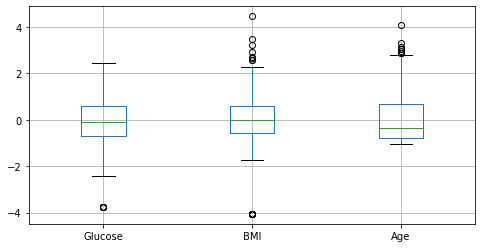

In [18]:
# Scaled features boxplots
scaled_df.boxplot(figsize=(8,4))
plt.show()

In [20]:
# Scale the whole dataframe (produces an array which can be converted to a dataframe)
scaled_array = scale(df)
scaled_df = pd.DataFrame(scaled_array, columns=df.columns)
scaled_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,3.614007e-18,-1.327244e-17,7.994184e-17,-3.556183e-17,2.295979e-16,2.398978e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


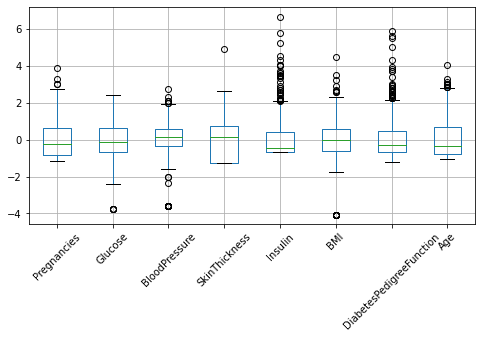

In [23]:
# Scaled boxplot
scaled_df.boxplot(figsize=(8,4), rot=45)
plt.show()

## Customising the Scale Function

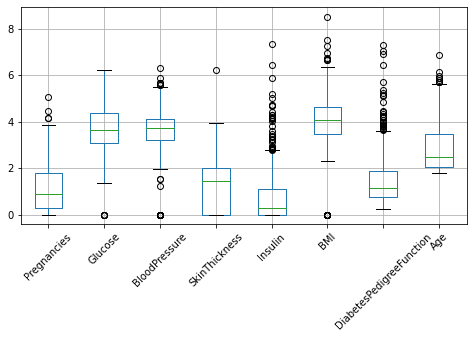

In [24]:
# Set the mean = True then it is set to zero before scaling, when False the variance/std will still be set to 1 
## Note scaling is done on a copy of the data when copy set to default (True)
scaled_df = pd.DataFrame(scale(df, with_mean=False), 
                         columns=df.columns)

scaled_df.boxplot(figsize=(8,4), rot=45)

plt.show()

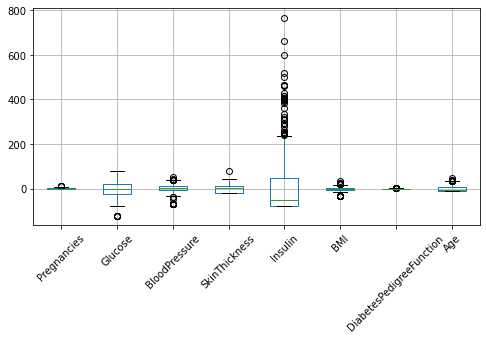

In [26]:
# When std set to False, the std and variance are not set to 1, the mean is set to zero but the std is not scaled
scaled_df = pd.DataFrame(scale(df, with_std=False), 
                         columns=df.columns)

scaled_df.boxplot(figsize=(8,4), rot=45)

plt.show()

## Standard Scaler

In [27]:
std_scaler = StandardScaler(copy=True, 
                            with_mean=True, 
                            with_std=True)

In [28]:
scaled_array = std_scaler.fit_transform(df)

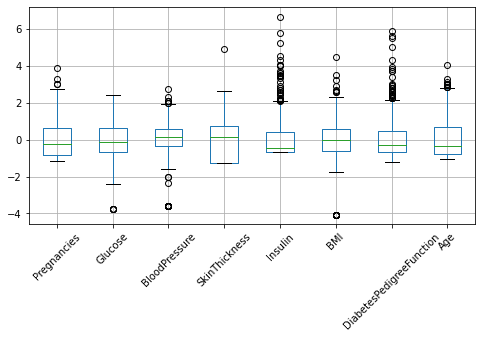

In [29]:
scaled_df = pd.DataFrame(scaled_array, columns=df.columns)
scaled_df.boxplot(figsize=(8,4), rot=45)
plt.show()

In [30]:
# Mean and variance
print(std_scaler.mean_)
print(std_scaler.var_)

[  3.84505208 120.89453125  69.10546875  20.53645833  79.79947917
  31.99257812   0.4718763   33.24088542]
[1.13392724e+01 1.02091726e+03 3.74159449e+02 2.54141900e+02
 1.32638869e+04 6.20790465e+01 1.09635697e-01 1.38122964e+02]


In [31]:
# Standard deviation
std_scaler.scale_

array([  3.36738361,  31.95179591,  19.34320163,  15.94182863,
       115.16894926,   7.87902573,   0.33111282,  11.75257265])

In [32]:
std_scaler.n_samples_seen_

768

In [33]:
scaled_df['Outcome'] = outcome
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


## Robust Scaling

In [39]:
robust_scaled_df = pd.DataFrame(robust_scale(df), 
                                columns=df.columns)

In [40]:
# Note the median is at zero
robust_scaled_df[['Glucose', 'BMI', 'Age']].describe()

,Glucose,BMI,Age
count,768.000000,768.000000,768.000000
mean,0.094413,-0.000798,0.249464
std,0.775094,0.847759,0.691778
min,-2.836364,-3.440860,-0.470588
25%,-0.436364,-0.505376,-0.294118
50%,0.000000,0.000000,0.000000
75%,0.563636,0.494624,0.705882
max,1.987879,3.774194,3.058824


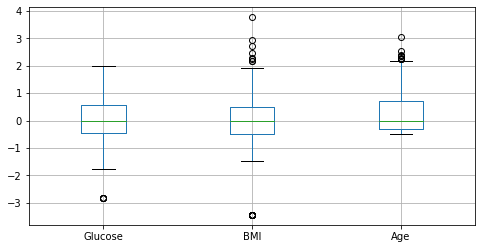

In [41]:
robust_scaled_df.boxplot(column=['Glucose', 'BMI', 'Age'], 
                         figsize=(8,4))

plt.show()

## Robust Scaler

In [42]:
# Use the robust scaler, with centering around the median True and scaling true
robust_scaler = RobustScaler(copy=True, 
                             with_centering=True, 
                             with_scaling=True)

robust_scaler

RobustScaler()

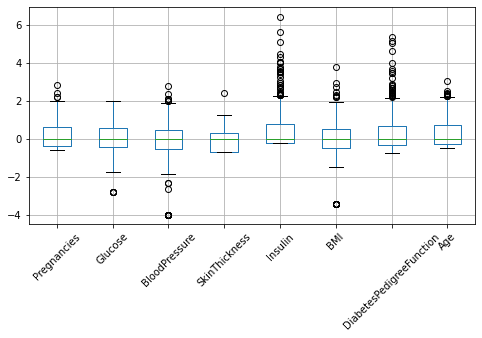

In [43]:
robust_scaled_array = robust_scaler.fit_transform(df)

robust_scaled_df = pd.DataFrame(robust_scaled_array,  
                                columns=df.columns)

robust_scaled_df.boxplot(figsize=(8,4), rot = 45)

plt.show()

# Normalization

## L2 Norm - default and used for cosine similarities

In [46]:
l2_normalized_df = pd.DataFrame(normalize(df, norm='l2'), 
                                columns=df.columns)

In [47]:
l2_normalized_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.033552,0.827625,0.402628,0.195722,0.000000,0.187893,0.003506,0.279603
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144
2,0.040398,0.924097,0.323181,0.000000,0.000000,0.117658,0.003393,0.161591
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655


In [53]:
# Take a sample row and square the values
l2_normalized_df.iloc[0].pow(2)

Pregnancies                 0.001126
Glucose                     0.684963
BloodPressure               0.162110
SkinThickness               0.038307
Insulin                     0.000000
BMI                         0.035304
DiabetesPedigreeFunction    0.000012
Age                         0.078178
Name: 0, dtype: float64

In [54]:
# Check by taking the square root and summing to one
math.sqrt(l2_normalized_df.iloc[0].pow(2).sum())

1.0

## L1 Norm

In [55]:
l1_normalized_df = pd.DataFrame(normalize(df, norm='l1'), 
                                columns=df.columns)

l1_normalized_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.017380,0.428703,0.208558,0.101383,0.000000,0.097327,0.001816,0.144832
1,0.004185,0.355721,0.276207,0.121364,0.000000,0.111320,0.001469,0.129734
2,0.025726,0.588477,0.205806,0.000000,0.000000,0.074926,0.002161,0.102903
3,0.003103,0.276169,0.204799,0.071369,0.291684,0.087195,0.000518,0.065163
4,0.000000,0.298873,0.087262,0.076355,0.366502,0.094025,0.004991,0.071991


In [57]:
# Check for a sample that the sum of the absolute values have a sum of one
l1_normalized_df.iloc[0].abs().sum()

0.9999999999999998

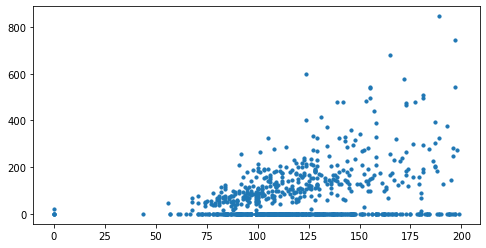

In [62]:
# Check how the transforms alter the data using an example of glucose and insulin
fig, ax = plt.subplots(figsize=(8,4))
plt.scatter(df['Glucose'], df['Insulin'], s= 10)
plt.show()

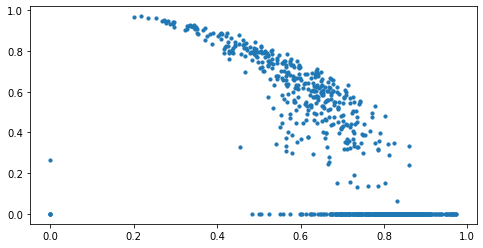

In [63]:
fig, ax = plt.subplots(figsize=(8,4))
plt.scatter(l2_normalized_df['Glucose'], 
            l2_normalized_df['Insulin'], s = 10)
plt.show()

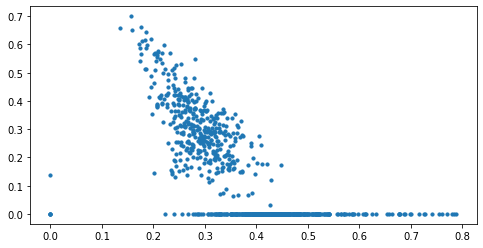

In [64]:
fig, ax = plt.subplots(figsize=(8,4))
plt.scatter(l1_normalized_df['Glucose'], 
            l1_normalized_df['Insulin'], s = 10)
plt.show()

Choose the transformation that gives the most useable result

## Max Norm - expressed a proportion of the max value for that row

In [65]:
max_normalized_df = pd.DataFrame(normalize(df, norm='max'), 
                                 columns=(df.columns))

max_normalized_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.040541,1.000000,0.486486,0.236486,0.0,0.227027,0.004236,0.337838
1,0.011765,1.000000,0.776471,0.341176,0.0,0.312941,0.004129,0.364706
2,0.043716,1.000000,0.349727,0.000000,0.0,0.127322,0.003672,0.174863
3,0.010638,0.946809,0.702128,0.244681,1.0,0.298936,0.001777,0.223404
4,0.000000,0.815476,0.238095,0.208333,1.0,0.256548,0.013619,0.196429


In [66]:
# Manually doing this transformation
df.iloc[0]/df.iloc[0].max()

Pregnancies                 0.040541
Glucose                     1.000000
BloodPressure               0.486486
SkinThickness               0.236486
Insulin                     0.000000
BMI                         0.227027
DiabetesPedigreeFunction    0.004236
Age                         0.337838
Name: 0, dtype: float64

## Cosine Similarity

In [67]:
cosine_similarity(df.iloc[10].values.reshape(1, -1), 
                  df.iloc[11].values.reshape(1, -1))

array([[0.96221582]])

In [68]:
cosine_similarity(df.iloc[8].values.reshape(1, -1), 
                  df.iloc[10].values.reshape(1, -1))

array([[0.34751949]])

In [69]:
cosine_similarity(df.iloc[8].values.reshape(1, -1), 
                  df.iloc[11].values.reshape(1, -1))

array([[0.36851998]])

In [70]:
cosine_similarity(l2_normalized_df.iloc[8].values.reshape(1, -1), 
                  l2_normalized_df.iloc[11].values.reshape(1, -1))

array([[0.36851998]])

# Transforming Bimodal Data

Useful to convert data for linear models. May distort linear correlations between variables as it is non-linear in nature. Helpful to render variables on different scales to be comparable.

# Store Visits Data

Note: Can't relay on the store id! Need to analyse without using it in a linear model

In [72]:
store_visits = pd.read_csv('datasets/store_visits.csv')
store_visits.sample(10)

,Visits,Revenue,StoreID
137,1029.722963,5161.614813,1
105,1047.965193,5277.825964,1
97,873.183127,4465.915636,1
27,1058.335019,5294.675097,1
8,913.955068,4586.775339,1
263,496.275473,704.233856,0
54,1111.266087,5572.330435,1
119,1003.888556,5065.442778,1
376,465.194922,589.216594,0
188,1074.544539,5404.722695,1


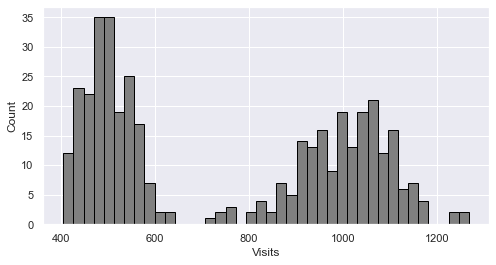

In [93]:
fig, ax = plt.subplots(figsize=(8,4))

plt.hist(store_visits['Visits'], 
         facecolor='grey', 
         edgecolor='black', 
         bins=40)

plt.xlabel('Visits')
plt.ylabel('Count')

plt.show()

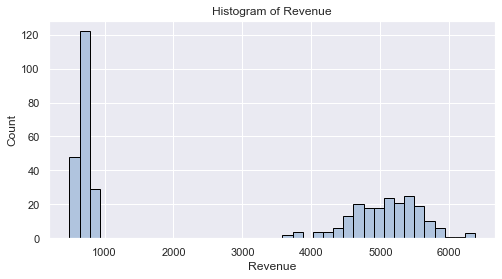

In [94]:
fig, ax = plt.subplots(figsize=(8,4))

plt.hist(store_visits['Revenue'], 
         facecolor='lightsteelblue', 
         edgecolor='black', 
         bins=40)

plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Histogram of Revenue')

plt.show()

In [95]:
transformer = QuantileTransformer(output_distribution='normal', n_quantiles=200)
store_transform = transformer.fit_transform(store_visits[['Visits','Revenue']])

In [96]:
store_transform_df = pd.DataFrame(data = store_transform,
                                  columns=['Visits_transform', 'Revenue_transform'])
store_transform_df.head()

,Visits_transform,Revenue_transform
0,0.689662,0.733025
1,0.990498,0.989974
2,0.315277,0.334061
3,0.370619,0.426712
4,1.221233,1.245011


In [81]:
final_df = pd.concat([store_visits, store_transform_df], axis=1)
final_df.head()

,Visits,Revenue,StoreID,Visits_transform,Revenue_transform
0,1023.178663,5165.893314,1,0.689662,0.733025
1,1058.607260,5349.036298,1,0.990498,0.989974
2,935.069490,4756.347453,1,0.315277,0.334061
3,952.360965,4849.804826,1,0.370619,0.426712
4,1078.384010,5467.920052,1,1.221233,1.245011


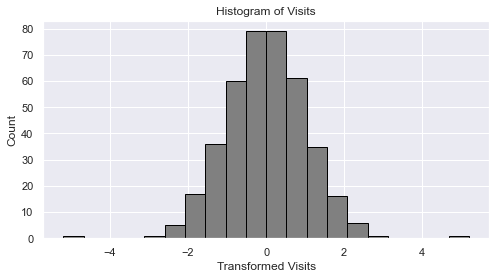

In [97]:
fig, ax = plt.subplots(figsize=(8,4))

plt.hist(final_df['Visits_transform'], 
         facecolor='grey', 
         edgecolor='black', 
         bins=20)

plt.xlabel('Transformed Visits')
plt.ylabel('Count')
plt.title('Histogram of Visits')

plt.show()

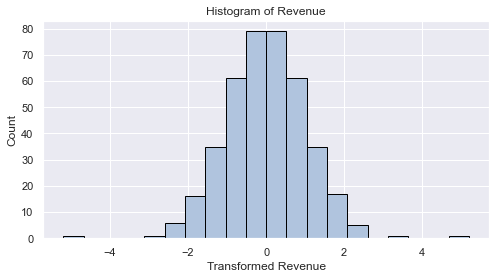

In [98]:
fig, ax = plt.subplots(figsize=(8,4))

plt.hist(final_df['Revenue_transform'], 
         facecolor='lightsteelblue', 
         edgecolor='black', 
         bins=20)

plt.xlabel('Transformed Revenue')
plt.ylabel('Count')
plt.title('Histogram of Revenue')

plt.show()

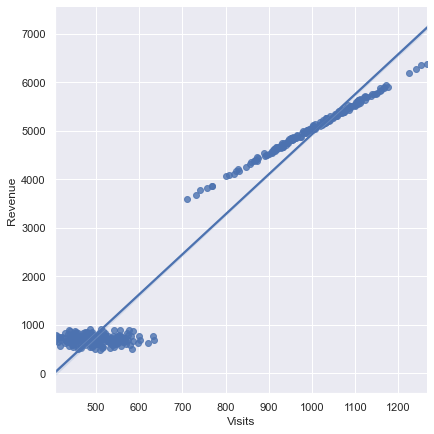

In [91]:
# Regression using the original data
sns.lmplot(x="Visits", 
           y="Revenue", 
           data=final_df, 
           height=6)

plt.show()

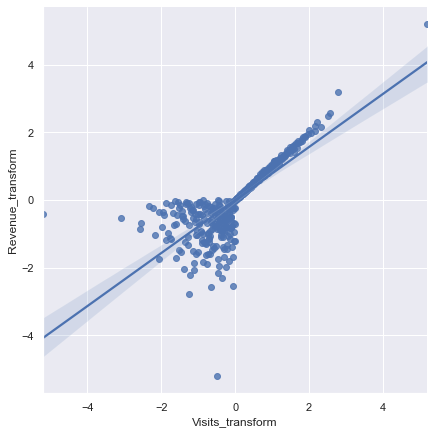

In [87]:
# Regression using the transformed data
g = sns.lmplot(x="Visits_transform", 
               y="Revenue_transform", 
               data=final_df, 
               height=6)

plt.show()

# Dimensionality Reduction - Singular Value Decomposition

In [100]:
df = pd.read_csv('datasets/diabetes_processed.csv')

In [101]:
FEATURES = list(df.columns[:-1])

FEATURES

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [102]:
LABEL = 'Outcome'

In [103]:
def build_model(n_components):
    
    X = df[FEATURES]
    Y = df[LABEL]
    
    fa_obj = FactorAnalysis(n_components = n_components, 
                            random_state = 10, 
                            max_iter=10000)
    
    x_new = fa_obj.fit_transform(X, Y)
    X = pd.DataFrame(x_new)

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    
    model = LogisticRegression(solver = 'liblinear', 
                               max_iter=1000)
    
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    pred_results = pd.DataFrame({'y_test' : y_test,
                                 'y_pred' : y_pred})
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    return {'fact_a_obj' : fa_obj,
            'transform_x' : X,
            'accuracy': acc, 
            'precision' : prec,
            'recall' : recall}  

In [104]:
def compare_results(result_dict):
    
    for key in result_dict:
        print('Test: ', key)

        print()
        print("accuracy_score : ", result_dict[key]['accuracy'])
        print("precision_score : ", result_dict[key]['precision'])
        print("recall_score : ", result_dict[key]['recall'])
       
        print()

In [108]:
def visualize_results(result_dict):
    
    n_components = list(range(0, 8))
    acc = [result_dict[key]['accuracy'] for key in result_dict]
    precision = [result_dict[key]['precision'] for key in result_dict]
    recall = [result_dict[key]['recall'] for key in result_dict]

    plt.figure(figsize = (10,5))
    plt.plot(n_components, acc, label='Accuracy')
    plt.plot(n_components, precision, label='Precision')
    plt.plot(n_components, recall, label='Recall')

    plt.xlabel('n components')
    plt.ylabel('score');
    
    plt.legend()
    
    plt.show()

In [109]:
result_dict = {}
    
for i in range (1, 9):
    result_dict['n_components - ' + str(i)] = build_model(i)

In [110]:
compare_results(result_dict)

Test:  n_components - 1

accuracy_score :  0.6948051948051948
precision_score :  0.5357142857142857
recall_score :  0.30612244897959184

Test:  n_components - 2

accuracy_score :  0.7012987012987013
precision_score :  0.6808510638297872
recall_score :  0.5079365079365079

Test:  n_components - 3

accuracy_score :  0.7402597402597403
precision_score :  0.6136363636363636
recall_score :  0.54

Test:  n_components - 4

accuracy_score :  0.7662337662337663
precision_score :  0.7333333333333333
recall_score :  0.5789473684210527

Test:  n_components - 5

accuracy_score :  0.7597402597402597
precision_score :  0.7567567567567568
recall_score :  0.5

Test:  n_components - 6

accuracy_score :  0.7402597402597403
precision_score :  0.65
recall_score :  0.5

Test:  n_components - 7

accuracy_score :  0.8246753246753247
precision_score :  0.7708333333333334
recall_score :  0.6981132075471698

Test:  n_components - 8

accuracy_score :  0.7662337662337663
precision_score :  0.8
recall_score :  0.53

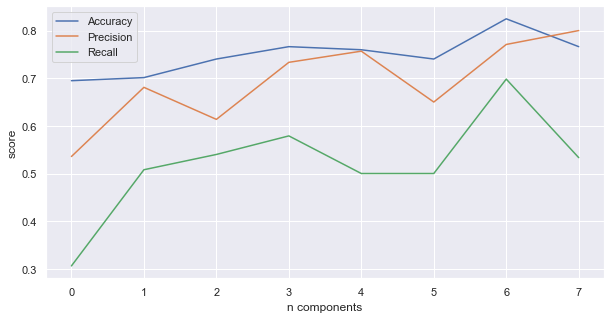

In [111]:
visualize_results(result_dict)

# Outlier Detection Methods

In [112]:
student_scores = pd.read_csv('datasets/student_performance.csv')
student_scores.sample(5)

,Hours Studied,Score Obtained,Outliers
29,223,8.915470,False
16,124,2.897272,False
56,448,59.290799,False
32,235,82.000000,True
19,144,80.000000,True


In [113]:
student_scores.shape

(122, 3)

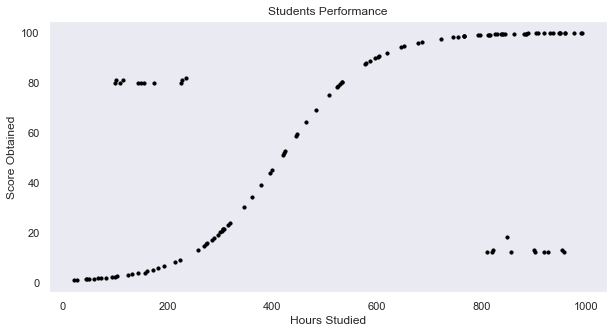

In [124]:
# Plot the two variables to identify outliers
fig, ax = plt.subplots(figsize=(10,5))

plt.scatter(student_scores['Hours Studied'], 
            student_scores['Score Obtained'], 
            color='black', 
            s=10)

ax.set(xlabel='Hours Studied', 
       ylabel='Score Obtained',
       title='Students Performance')

ax.grid()
plt.show()

In [117]:
# How many datapoints are outliers and how many are not
student_scores.groupby('Outliers').size()

Outliers
False    100
True      22
dtype: int64

In [118]:
# Drop those rows that are defined as outliers
X = student_scores.drop('Outliers', axis=1)
X.head()

,Hours Studied,Score Obtained
0,22,0.869736
1,26,0.912112
2,45,1.143020
3,46,1.156660
4,50,1.212843


## Local Outlier Factor

In [120]:
# Contaminant factor - proportion of outliers in the dataset. We know the rough number of outliers in the dataset but leave to
# default if not known
lof = LocalOutlierFactor(n_neighbors=20, 
                         contamination=0.2)

In [121]:
# The outlier points are shown as -1.
y_pred = lof.fit_predict(X)
y_pred

array([-1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
       -1, -1, -1])

In [122]:
n_outliers = (y_pred == -1).sum()
n_outliers

25

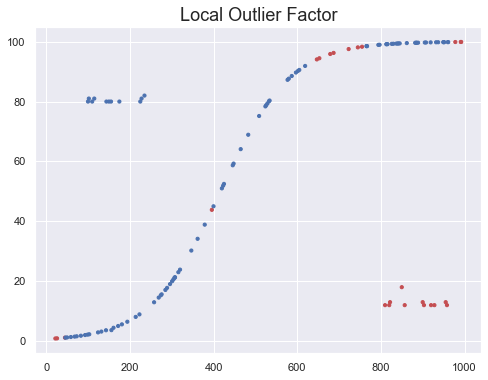

In [128]:
# Show the outliers on a chart
colors = np.array(['r', 'b'])
plt.figure(figsize=(8,6))
plt.title('Local Outlier Factor', size=18)

plt.scatter(student_scores['Hours Studied'], 
            student_scores['Score Obtained'], 
            s=10, 
            color=colors[(y_pred + 1) // 2])

plt.show()

In [129]:
# gives the negative LOF score. Scores far from -1 are outliers
X_scores = lof.negative_outlier_factor_
X_scores[0:10]

array([-1.14317945, -1.12665573, -1.0567161 , -1.05368781, -1.04373738,
       -1.02975328, -1.02410918, -1.02484211, -1.02727546, -1.02988938])

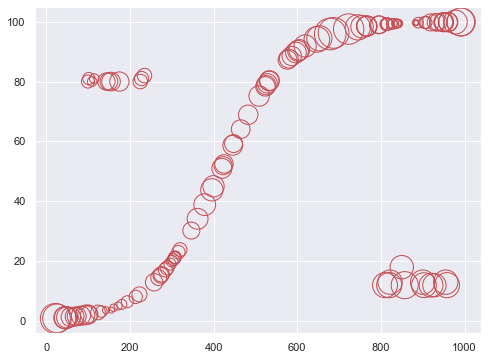

In [132]:
# Radius to represent the degree of normality of a datapoint (scale a value)
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.figure(figsize=(8,6))

plt.scatter(student_scores['Hours Studied'], 
            student_scores['Score Obtained'],
            s=1000 * radius, 
            edgecolors='r',
            facecolors='none', 
            label='Outlier scores')

plt.show()

## Isolation Forest

In [141]:
isf =  IsolationForest(contamination=0.19)

In [142]:
y_pred = isf.fit_predict(X)
y_pred

array([-1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1, -1, -1])

In [143]:
n_outliers = (y_pred == -1).sum()
n_outliers

23

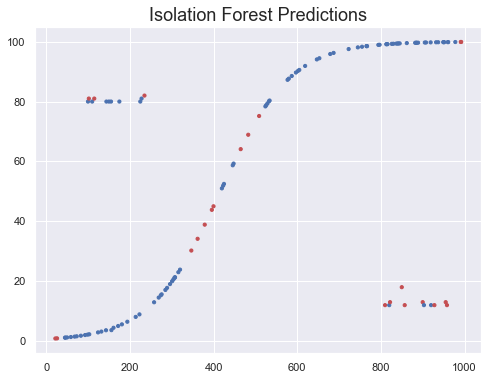

In [145]:
colors = np.array(['r', 'b'])
plt.figure(figsize=(8,6))
plt.title('Isolation Forest Predictions', size=18)

plt.scatter(student_scores['Hours Studied'], 
            student_scores['Score Obtained'], 
            s=10, 
            color=colors[(y_pred + 1) // 2])


plt.show()

## Elliptical Envelope

In [148]:
ee = EllipticEnvelope(support_fraction=1., contamination=0.19)

In [149]:
y_pred = ee.fit_predict(X)
y_pred

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,
        1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1])

In [150]:
n_outliers = (y_pred == -1).sum()
n_outliers

23

In [152]:
xx, yy = np.meshgrid(np.linspace(0, 1010, 500),
                     np.linspace(0, 102, 500))

print('xx = ', xx.ravel())
print('yy = ', yy.ravel())

xx, yy = np.meshgrid(np.linspace(0, 1010, 500),
                     np.linspace(-5, 120, 500))

Z = ee.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

xx =  [   0.            2.0240481     4.04809619 ... 1005.95190381 1007.9759519
 1010.        ]
yy =  [  0.   0.   0. ... 102. 102. 102.]


<Figure size 576x432 with 0 Axes>

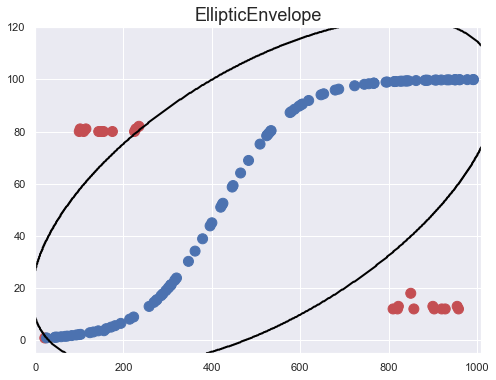

In [157]:
plt.figure(figsize=(8,6))

plt.figure(figsize=(8,6))

plt.title('EllipticEnvelope', size=18)

plt.scatter(student_scores['Hours Studied'], 
            student_scores['Score Obtained'], 
            s=100, 
            color=colors[(y_pred + 1) // 2])

plt.contour(xx, yy, Z, 
            levels=[0], 
            linewidths=2, 
            colors='black')

plt.show()

# Novelty Detection

Is a new datapoint an outlier?

In [158]:
scores_dataset = pd.read_csv('datasets/student_performance_modified.csv')
scores_dataset.sample(10)

,Hours Studied,Score Obtained,Outliers,Training,Test
42,307,21.148456,False,0,1
30,225,80.000000,True,0,1
24,172,5.040238,False,0,1
71,619,91.893768,False,1,0
113,951,99.836095,False,1,0
41,304,20.554359,False,1,0
104,903,12.000000,True,0,1
5,59,1.349299,False,1,0
36,276,15.603904,False,0,1
95,845,99.417642,False,1,0


In [159]:
x_training = scores_dataset.loc[scores_dataset['Training']==1]
x_training.head()

,Hours Studied,Score Obtained,Outliers,Training,Test
1,26,0.912112,False,1,0
3,46,1.156660,False,1,0
5,59,1.349299,False,1,0
7,73,1.592205,False,1,0
9,93,2.015385,False,1,0


In [160]:
x_training = x_training.drop(['Outliers', 'Training', 'Test'], axis=1)
x_training.head()

,Hours Studied,Score Obtained
1,26,0.912112
3,46,1.156660
5,59,1.349299
7,73,1.592205
9,93,2.015385


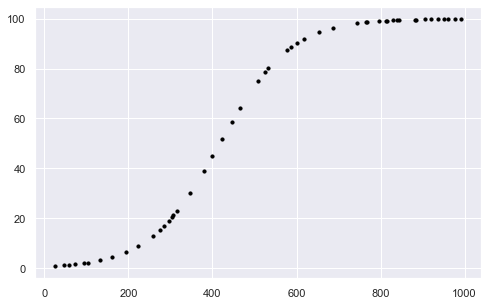

In [162]:
plt.figure(figsize=(8,5))

plt.scatter(x_training['Hours Studied'], 
            x_training['Score Obtained'], 
            s=10, 
            c='black')

plt.show()

In [163]:
x_testing = scores_dataset.loc[scores_dataset['Test']==1]
x_testing = x_testing.drop(['Outliers', 'Training', 'Test'], axis=1)
x_testing.head()

,Hours Studied,Score Obtained
0,22,0.869736
2,45,1.143020
4,50,1.212843
6,68,1.500874
8,83,1.791570


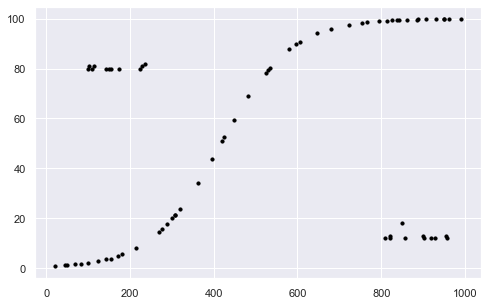

In [165]:
plt.figure(figsize=(8,5))

plt.scatter(x_testing['Hours Studied'], 
            x_testing['Score Obtained'], 
            s=10, 
            c='black')

plt.show()

In [166]:
# Novelty = True
lof_novelty = LocalOutlierFactor(n_neighbors=5, 
                                 contamination='auto', 
                                 novelty=True)

lof_novelty.fit(x_training)

y_pred = lof_novelty.predict(x_testing)
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
       -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,
       -1, -1,  1,  1])

In [167]:
n_outliers = (y_pred == -1).sum()
n_outliers

14

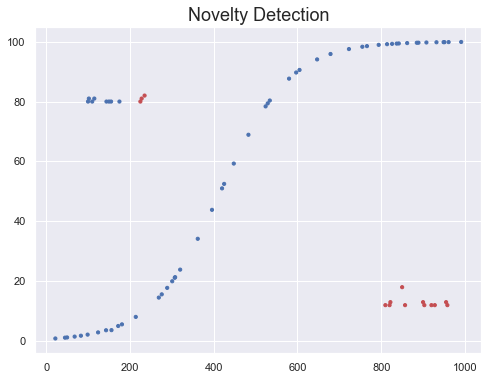

In [168]:
plt.figure(figsize=(8,6))

plt.title('Novelty Detection', size=18)

plt.scatter(x_testing['Hours Studied'], 
            x_testing['Score Obtained'], 
            s=10, 
            color=colors[(y_pred + 1) // 2])

plt.show()

In [169]:
# Set the contamination to 0.01
lof_novelty = LocalOutlierFactor(n_neighbors=5, 
                                 contamination=0.01, 
                                 novelty=True)
lof_novelty.fit(x_training)

y_pred = lof_novelty.predict(x_testing)
y_pred

array([ 1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,
       -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
       -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,
       -1, -1,  1,  1])

In [170]:
n_outliers = (y_pred == -1).sum()
n_outliers

22

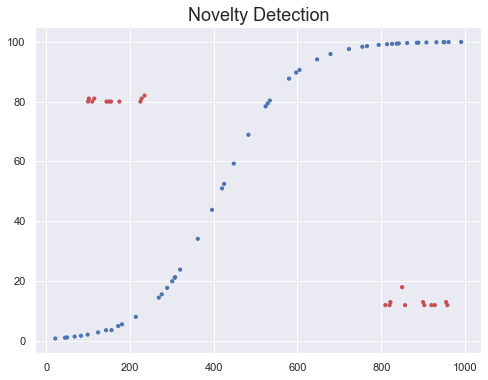

In [172]:
plt.figure(figsize=(8,6))

plt.title('Novelty Detection', size=18)

plt.scatter(x_testing['Hours Studied'], 
            x_testing['Score Obtained'], 
            s=10, 
            color=colors[(y_pred + 1) // 2])

plt.show()

Those students who spent a long time studying and didn't perform well in the test and those who did not study for a long time but performed well in the test are both considered to be outlier groups or anomalies.

### Predict using the LOF

In [173]:
INLIER = np.array([[500, 99]])
OUTLIER = np.array([[10000, 40000]])

In [174]:
# Pass to the LOF predicter
lof_novelty.predict(INLIER), lof_novelty.predict(OUTLIER)

(array([1]), array([-1]))

In [175]:
# Smaller scores indicate outliers
lof_novelty.score_samples(INLIER), lof_novelty.score_samples(OUTLIER)

(array([-1.01386409]), array([-818.57692939]))

In [176]:
# Negative scores are outliers
lof_novelty.decision_function(INLIER), lof_novelty.decision_function(OUTLIER)

(array([0.39025402]), array([-817.17281128]))

### Predict using the Isolation Forest

In [177]:
# Both tagged as outliers which is not correct
isf.predict(INLIER), isf.predict(OUTLIER)

(array([-1]), array([-1]))

In [178]:
# The scores are similar which is a measure of normality (depth of the leaf so smaller depths are anomalies). Both tagged
isf.score_samples(INLIER), isf.score_samples(OUTLIER)

(array([-0.55960134]), array([-0.55740935]))

In [179]:
# Average anomaly score
isf.decision_function(INLIER), isf.decision_function(OUTLIER)

(array([-0.01744158]), array([-0.01524958]))

### Prediction using the Elliptical Envelope

In [180]:
ee.predict(INLIER), ee.predict(OUTLIER)

(array([1]), array([-1]))

In [181]:
# The outlier has a very large distance score
ee.score_samples(INLIER), ee.score_samples(OUTLIER)

(array([-1.87453537]), array([-1503979.60043687]))

In [182]:
# Negative values are outliers
ee.decision_function(INLIER), ee.decision_function(OUTLIER)

(array([0.92463624]), array([-1503976.80126526]))

## Example of Outlier Detection Using Head Dataset

In [185]:
head_brain_data = pd.read_csv('datasets/headbrain.csv')
head_brain_data.head(5)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [186]:
head_brain_data.shape

(237, 4)

In [187]:
HEAD_SIZE = 'Head Size(cm^3)'
BRAIN_WEIGHT = 'Brain Weight(grams)'

In [189]:
X = head_brain_data[[HEAD_SIZE, BRAIN_WEIGHT]]
X.sample(3)

,Head Size(cm^3),Brain Weight(grams)
196,3058,1120
139,3171,1127
201,3228,1235


In [190]:
X.describe()

,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000
mean,3633.991561,1282.873418
std,365.261422,120.340446
min,2720.000000,955.000000
25%,3389.000000,1207.000000
50%,3614.000000,1280.000000
75%,3876.000000,1350.000000
max,4747.000000,1635.000000


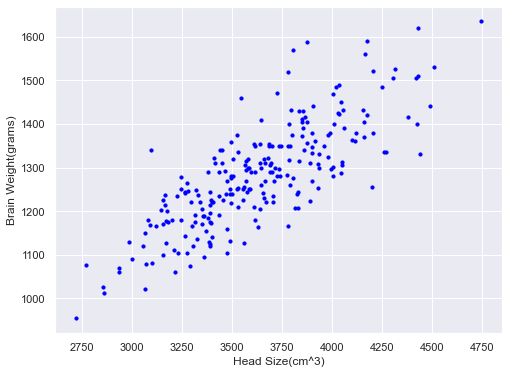

In [192]:
plt.figure(figsize=(8,6))
plt.scatter(X[HEAD_SIZE], X[BRAIN_WEIGHT], s=10, color='blue')
plt.ylabel("Brain Weight(grams)")
plt.xlabel("Head Size(cm^3)")
plt.show()

In [194]:
ee = EllipticEnvelope(support_fraction=None, contamination=0.1)
y_pred = ee.fit_predict(X)

In [195]:
n_outliers = (y_pred == -1).sum()
n_outliers

24

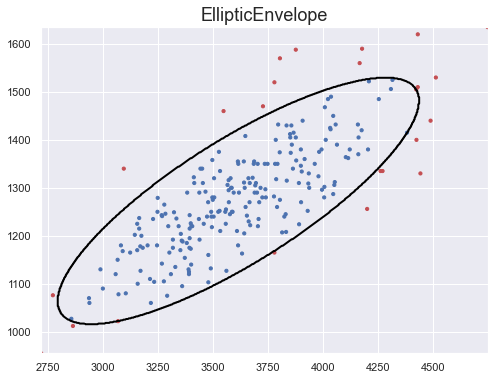

In [197]:
xx, yy = np.meshgrid(np.linspace(X[HEAD_SIZE].min(), X[HEAD_SIZE].max(), 500),
                     np.linspace(X[BRAIN_WEIGHT].min(), X[BRAIN_WEIGHT].max(), 500))

Z = ee.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))

plt.title('EllipticEnvelope', size=18)

colors = np.array(['r', 'b'])

plt.scatter(X[HEAD_SIZE], 
            X[BRAIN_WEIGHT], 
            s=10, 
            color=colors[(y_pred + 1) // 2])

plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

plt.show()

In [199]:
isf =  IsolationForest(contamination=0.08)
y_pred = isf.fit_predict(X)
n_outliers = (y_pred == -1).sum()
n_outliers

19

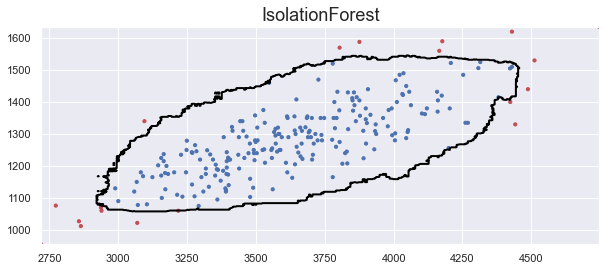

In [200]:
xx, yy = np.meshgrid(np.linspace(X[HEAD_SIZE].min(), X[HEAD_SIZE].max(), 500),
                     np.linspace(X[BRAIN_WEIGHT].min(), X[BRAIN_WEIGHT].max(), 500))

Z = isf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,4))

plt.title('IsolationForest', size=18)

plt.scatter(X[HEAD_SIZE], 
            X[BRAIN_WEIGHT], 
            s=10, 
            color=colors[(y_pred + 1) // 2])


plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

plt.show()

In [201]:
lof = LocalOutlierFactor(n_neighbors=15, contamination='auto')
y_pred = lof.fit_predict(X)
n_outliers = (y_pred == -1).sum()
n_outliers

12

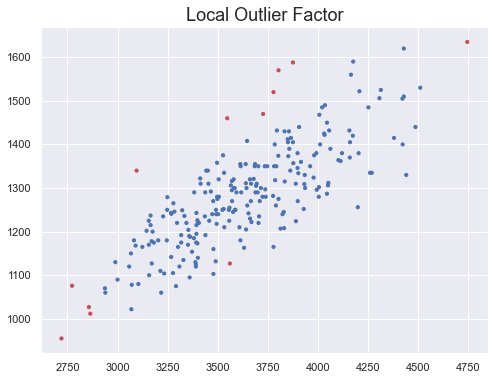

In [203]:
plt.figure(figsize=(8,6))

plt.title('Local Outlier Factor', size=18)

plt.scatter(X[HEAD_SIZE], 
            X[BRAIN_WEIGHT], 
            s=10, 
            color=colors[(y_pred + 1) // 2])

plt.show()

In [204]:
X_scores = lof.negative_outlier_factor_
X_scores[0:10]

array([-1.32656456, -1.01072182, -1.11625177, -1.06464106, -1.31187691,
       -0.98778784, -1.03806996, -0.97987273, -1.10204192, -0.98907949])

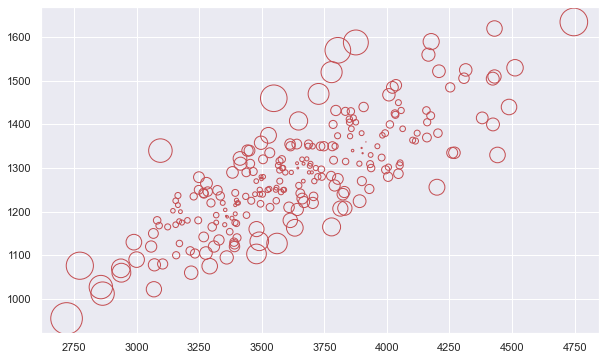

In [205]:
plt.figure(figsize=(10,6))

radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

plt.scatter(X[HEAD_SIZE], 
            X[BRAIN_WEIGHT], 
            s=1000 * radius, edgecolors='r',
            facecolors='none', 
            label='Outlier scores')

plt.show()

# Preparing Text Data

## Bag of Words with Countvectorizer

In [207]:
train_text = ["The Pessimist Sees Difficulty In Every Opportunity.",
              "The Optimist Sees Opportunity In Every Difficulty.",
              "Don’t Let Yesterday Take Up Too Much Of Today. ",
              "You Learn More From Failure Than From Success.",
              "We May Encounter Many Defeats But We Must Not Be Defeated.",
              "Life Is Either A Daring Adventure Or Nothing."]

count_vectorizer = CountVectorizer()
count_vectorizer.fit(train_text)

CountVectorizer()

In [209]:
print(count_vectorizer.get_feature_names())

['adventure', 'be', 'but', 'daring', 'defeated', 'defeats', 'difficulty', 'don', 'either', 'encounter', 'every', 'failure', 'from', 'in', 'is', 'learn', 'let', 'life', 'many', 'may', 'more', 'much', 'must', 'not', 'nothing', 'of', 'opportunity', 'optimist', 'or', 'pessimist', 'sees', 'success', 'take', 'than', 'the', 'today', 'too', 'up', 'we', 'yesterday', 'you']


In [210]:
print(count_vectorizer.vocabulary_)

{'the': 34, 'pessimist': 29, 'sees': 30, 'difficulty': 6, 'in': 13, 'every': 10, 'opportunity': 26, 'optimist': 27, 'don': 7, 'let': 16, 'yesterday': 39, 'take': 32, 'up': 37, 'too': 36, 'much': 21, 'of': 25, 'today': 35, 'you': 40, 'learn': 15, 'more': 20, 'from': 12, 'failure': 11, 'than': 33, 'success': 31, 'we': 38, 'may': 19, 'encounter': 9, 'many': 18, 'defeats': 5, 'but': 2, 'must': 22, 'not': 23, 'be': 1, 'defeated': 4, 'life': 17, 'is': 14, 'either': 8, 'daring': 3, 'adventure': 0, 'or': 28, 'nothing': 24}


In [211]:
transformed_vector = count_vectorizer.transform(train_text)
print(transformed_vector.shape)
print(transformed_vector.toarray())

(6, 41)
[[0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0
  0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0
  0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1
  1 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
  0 0 0 0 1]
 [0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 2 0 0]
 [1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 0]]


In [212]:
count_vectorizer.inverse_transform(transformed_vector)

[array(['difficulty', 'every', 'in', 'opportunity', 'pessimist', 'sees',
        'the'], dtype='<U11'),
 array(['difficulty', 'every', 'in', 'opportunity', 'optimist', 'sees',
        'the'], dtype='<U11'),
 array(['don', 'let', 'much', 'of', 'take', 'today', 'too', 'up',
        'yesterday'], dtype='<U11'),
 array(['failure', 'from', 'learn', 'more', 'success', 'than', 'you'],
       dtype='<U11'),
 array(['be', 'but', 'defeated', 'defeats', 'encounter', 'many', 'may',
        'must', 'not', 'we'], dtype='<U11'),
 array(['adventure', 'daring', 'either', 'is', 'life', 'nothing', 'or'],
       dtype='<U11')]

In [215]:
test_text = ["A room without books is like a body without a soul."]
count_vectorizer.transform(test_text).toarray()
count_vectorizer.fit(train_text + test_text)
count_vectorizer.transform(test_text).toarray()
text = ["I'm a pessimist because of intelligence, but an optimist because of will.",
        "Success is not final, failure is not fatal"]

transformed_vector = count_vectorizer.transform(text)
print(transformed_vector)
transformed_vector.shape
print(transformed_vector.toarray())

  (0, 4)	1
  (0, 28)	2
  (0, 30)	1
  (0, 32)	1
  (1, 13)	1
  (1, 16)	2
  (1, 26)	2
  (1, 36)	1
[[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0]]


## Bag of Words with Ngrams

In [221]:
# Choose ngram of 2 which give ngrams of two words - can also do (1,2) which gives unigrams and bigrams etc
n_gram_vectorizer = CountVectorizer(ngram_range=(2, 2))
transformed_vector = n_gram_vectorizer.fit_transform(train_text)
print(n_gram_vectorizer.vocabulary_)
transformed_vector.toarray()

{'the pessimist': 35, 'pessimist sees': 29, 'sees difficulty': 30, 'difficulty in': 5, 'in every': 14, 'every opportunity': 10, 'the optimist': 34, 'optimist sees': 27, 'sees opportunity': 31, 'opportunity in': 26, 'every difficulty': 9, 'don let': 6, 'let yesterday': 17, 'yesterday take': 40, 'take up': 32, 'up too': 37, 'too much': 36, 'much of': 22, 'of today': 25, 'you learn': 41, 'learn more': 16, 'more from': 21, 'from failure': 12, 'failure than': 11, 'than from': 33, 'from success': 13, 'we may': 38, 'may encounter': 20, 'encounter many': 8, 'many defeats': 19, 'defeats but': 4, 'but we': 2, 'we must': 39, 'must not': 23, 'not be': 24, 'be defeated': 1, 'life is': 18, 'is either': 15, 'either daring': 7, 'daring adventure': 3, 'adventure or': 0, 'or nothing': 28}


array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

In [219]:
transformed_vector.toarray().shape

(6, 42)

In [220]:
n_gram_vectorizer.inverse_transform(transformed_vector)

[array(['the pessimist', 'pessimist sees', 'sees difficulty',
        'difficulty in', 'in every', 'every opportunity'], dtype='<U17'),
 array(['in every', 'the optimist', 'optimist sees', 'sees opportunity',
        'opportunity in', 'every difficulty'], dtype='<U17'),
 array(['don let', 'let yesterday', 'yesterday take', 'take up', 'up too',
        'too much', 'much of', 'of today'], dtype='<U17'),
 array(['you learn', 'learn more', 'more from', 'from failure',
        'failure than', 'than from', 'from success'], dtype='<U17'),
 array(['we may', 'may encounter', 'encounter many', 'many defeats',
        'defeats but', 'but we', 'we must', 'must not', 'not be',
        'be defeated'], dtype='<U17'),
 array(['life is', 'is either', 'either daring', 'daring adventure',
        'adventure or', 'or nothing'], dtype='<U17')]

## TFIDF Vectorizer

In [228]:
tfidf_vectorizer = TfidfVectorizer()
transformed_vector = tfidf_vectorizer.fit_transform(train_text)
transformed_vector.toarray()[0:1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.36546139, 0.        , 0.        , 0.        ,
        0.36546139, 0.        , 0.        , 0.36546139, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.36546139, 0.        , 0.        , 0.44567684,
        0.36546139, 0.        , 0.        , 0.        , 0.36546139,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [224]:
transformed_vector.toarray().shape

(6, 41)

In [229]:
tfidf_vectorizer.idf_

array([2.25276297, 2.25276297, 2.25276297, 2.25276297, 2.25276297,
       2.25276297, 1.84729786, 2.25276297, 2.25276297, 2.25276297,
       1.84729786, 2.25276297, 2.25276297, 1.84729786, 2.25276297,
       2.25276297, 2.25276297, 2.25276297, 2.25276297, 2.25276297,
       2.25276297, 2.25276297, 2.25276297, 2.25276297, 2.25276297,
       2.25276297, 1.84729786, 2.25276297, 2.25276297, 2.25276297,
       1.84729786, 2.25276297, 2.25276297, 2.25276297, 1.84729786,
       2.25276297, 2.25276297, 2.25276297, 2.25276297, 2.25276297,
       2.25276297])

In [231]:
print(list(zip(tfidf_vectorizer.get_feature_names(), tfidf_vectorizer.idf_)))

[('adventure', 2.252762968495368), ('be', 2.252762968495368), ('but', 2.252762968495368), ('daring', 2.252762968495368), ('defeated', 2.252762968495368), ('defeats', 2.252762968495368), ('difficulty', 1.8472978603872037), ('don', 2.252762968495368), ('either', 2.252762968495368), ('encounter', 2.252762968495368), ('every', 1.8472978603872037), ('failure', 2.252762968495368), ('from', 2.252762968495368), ('in', 1.8472978603872037), ('is', 2.252762968495368), ('learn', 2.252762968495368), ('let', 2.252762968495368), ('life', 2.252762968495368), ('many', 2.252762968495368), ('may', 2.252762968495368), ('more', 2.252762968495368), ('much', 2.252762968495368), ('must', 2.252762968495368), ('not', 2.252762968495368), ('nothing', 2.252762968495368), ('of', 2.252762968495368), ('opportunity', 1.8472978603872037), ('optimist', 2.252762968495368), ('or', 2.252762968495368), ('pessimist', 2.252762968495368), ('sees', 1.8472978603872037), ('success', 2.252762968495368), ('take', 2.252762968495368)

In [232]:
tfidf_vectorizer.inverse_transform(transformed_vector)

[array(['opportunity', 'every', 'in', 'difficulty', 'sees', 'pessimist',
        'the'], dtype='<U11'),
 array(['optimist', 'opportunity', 'every', 'in', 'difficulty', 'sees',
        'the'], dtype='<U11'),
 array(['today', 'of', 'much', 'too', 'up', 'take', 'yesterday', 'let',
        'don'], dtype='<U11'),
 array(['success', 'than', 'failure', 'from', 'more', 'learn', 'you'],
       dtype='<U11'),
 array(['defeated', 'be', 'not', 'must', 'but', 'defeats', 'many',
        'encounter', 'may', 'we'], dtype='<U11'),
 array(['nothing', 'or', 'adventure', 'daring', 'either', 'is', 'life'],
       dtype='<U11')]

## Hashing Vectorizer

* The use of hashing buckets to represent words allows us to scale large data sets when we use the HashingVectorizer.
* The input argument to the vectorizer is the number of hash buckets (n_features)
* Result : numeric representation of all the words in documents.
* Word ids are from 0 to (n_features - 1) because total of n_features buckets.
* Because the size of vocabulary is larger than the number of buckets, multiple words can hash to the same bucket.
* No way to get back to the original value from the hash bucket value.
* Frequencies of each is represented in normalized from

In [235]:
vectorizer = HashingVectorizer(n_features=8, 
                               norm=None)

hash_vector = vectorizer.transform(train_text)

hash_vector.shape

(6, 8)

In [236]:
hash_vector.toarray()

array([[ 0.,  2.,  1., -1., -1.,  1., -1.,  0.],
       [ 0.,  2.,  0., -1., -1.,  1., -1., -1.],
       [-1., -1.,  0.,  0.,  2.,  1., -1., -1.],
       [ 0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
       [ 1.,  1.,  0., -2.,  1.,  1.,  1.,  2.],
       [-1.,  0.,  0.,  0.,  1.,  1., -1.,  1.]])

In [238]:
# Using l1 norm (will add to one)
vectorizer = HashingVectorizer(n_features=8, 
                               norm='l1')

hash_vector = vectorizer.transform(train_text)

hash_vector.shape

(6, 8)

In [239]:
hash_vector.toarray()

array([[ 0.        ,  0.28571429,  0.14285714, -0.14285714, -0.14285714,
         0.14285714, -0.14285714,  0.        ],
       [ 0.        ,  0.28571429,  0.        , -0.14285714, -0.14285714,
         0.14285714, -0.14285714, -0.14285714],
       [-0.14285714, -0.14285714,  0.        ,  0.        ,  0.28571429,
         0.14285714, -0.14285714, -0.14285714],
       [ 0.        ,  0.        ,  0.        , -0.5       ,  0.        ,
         0.        ,  0.        , -0.5       ],
       [ 0.11111111,  0.11111111,  0.        , -0.22222222,  0.11111111,
         0.11111111,  0.11111111,  0.22222222],
       [-0.2       ,  0.        ,  0.        ,  0.        ,  0.2       ,
         0.2       , -0.2       ,  0.2       ]])

In [242]:
# Using L2 norm
vectorizer = HashingVectorizer(n_features=8, 
                               norm='l2')

hash_vector = vectorizer.transform(train_text)

hash_vector.shape

(6, 8)

In [243]:
hash_vector.toarray()

array([[ 0.        ,  0.66666667,  0.33333333, -0.33333333, -0.33333333,
         0.33333333, -0.33333333,  0.        ],
       [ 0.        ,  0.66666667,  0.        , -0.33333333, -0.33333333,
         0.33333333, -0.33333333, -0.33333333],
       [-0.33333333, -0.33333333,  0.        ,  0.        ,  0.66666667,
         0.33333333, -0.33333333, -0.33333333],
       [ 0.        ,  0.        ,  0.        , -0.70710678,  0.        ,
         0.        ,  0.        , -0.70710678],
       [ 0.2773501 ,  0.2773501 ,  0.        , -0.5547002 ,  0.2773501 ,
         0.2773501 ,  0.2773501 ,  0.5547002 ],
       [-0.4472136 ,  0.        ,  0.        ,  0.        ,  0.4472136 ,
         0.4472136 , -0.4472136 ,  0.4472136 ]])

## Dictionary Learning

In [274]:
movie_ratings = [{'name':'Avengers Endgame', 'imdb':8.8},
                {'name':'Inception','imdb':8.8},
                {'name':'The Wolf of Wall Street','imdb':8.2}]

In [275]:
vec = DictVectorizer()

In [276]:
transformed = vec.fit_transform(movie_ratings)

In [277]:
transformed = transformed.toarray()
transformed

array([[8.8, 1. , 0. , 0. ],
       [8.8, 0. , 1. , 0. ],
       [8.2, 0. , 0. , 1. ]])

In [278]:
vec.get_feature_names()

['imdb',
 'name=Avengers Endgame',
 'name=Inception',
 'name=The Wolf of Wall Street']

In [279]:
vec.vocabulary_

{'name=Avengers Endgame': 1,
 'imdb': 0,
 'name=Inception': 2,
 'name=The Wolf of Wall Street': 3}

In [280]:
movies = pd.DataFrame(transformed, columns = vec.get_feature_names())
movies

,imdb,name=Avengers Endgame,name=Inception,name=The Wolf of Wall Street
0,8.8,1.0,0.0,0.0
1,8.8,0.0,1.0,0.0
2,8.2,0.0,0.0,1.0
